<a href="https://colab.research.google.com/github/Biangelica/Data-Science-MBA-CEMEAI/blob/main/T%C3%A9cnicas%20Avan%C3%A7adas%20de%20Captura%20e%20Tratamento%20de%20Dados/Aula%201/TACTD_01_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

In [1]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`. Essa base contém dados de profissionais da área da saúde incluindo: nome, sexo, ano de nascimento, religião, país e cidade de residência, país de origem, idade ao final de 2022, salário e ano do primeiro emprego.

### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`.

Analise o atributo 'Sex' buscando por dados incorretos, considerando que são corretos apenas 'F' e 'M' (em letras maiúsculas). Corrija os que forem possível corrigir.

Após o tratamento, analise as linhas com dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', inspecionando em conjunto com as colunas: Year of Birth, Country of Residency e City (analisar apenas essas colunas).

Com essa análise podemos dizer que os dados faltantes:

 (a) São do tipo completamente aleatório (MCAR)<br>
 (b) São do tipo (condicionalmente) aleatório (MAR)<br>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br>
 (e) Metade são do tipo (condicionalmente) aleatório (MAR) e a outra metade completamente aleatório (MCAR)<br>

In [3]:
df = pd.read_csv("TACTD-01-Base-Avaliacao2024.csv")

In [10]:
## seu codigo
df['Sex'].unique()

#(c) São do tipo não aleatório

array(['M', 'F', 'masc', 'f', 'm', nan], dtype=object)

In [57]:
df['Sex'] = df['Sex'].str.upper()

df['Sex'] =  df['Sex'].replace('MASC', 'M')

sex_na = df[~df['Sex'].isin(['F', 'M'])]

df = df.dropna(subset=['Sex'])

df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [58]:
columns = ['Sex', 'Year of Birth', 'Country of Residency', 'City']
print(sex_na[columns])

Empty DataFrame
Columns: [Sex, Year of Birth, Country of Residency, City]
Index: []


In [59]:
file_path = "TACTD-01-Base-Avaliacao2024.csv"
data = pd.read_csv(file_path)

# Analisar valores únicos em 'Sex' e contar ocorrências
print("Valores únicos em 'Sex' e suas contagens antes da correção:")
print(data['Sex'].value_counts())

# Corrigir valores incorretos para 'F' ou 'M'
data['Sex'] = data['Sex'].replace(['masc', 'f', 'm'], ['M', 'F', 'M'])

# Verificar novamente os valores únicos após correção
print("\nValores únicos em 'Sex' e suas contagens após a correção:")
print(data['Sex'].value_counts())

missing_sex = data[~data['Sex'].isin(['F', 'M'])]

# Mostrar essas linhas junto com 'Year of Birth', 'Country of Residency' e 'City'
columns_to_show = ['Sex', 'Year of Birth', 'Country of Residency', 'City']
print("\nLinhas com dados faltantes em 'Sex' e suas informações:")
print(missing_sex[columns_to_show])


Valores únicos em 'Sex' e suas contagens antes da correção:
Sex
F       45
M       35
masc     6
f        2
m        2
Name: count, dtype: int64

Valores únicos em 'Sex' e suas contagens após a correção:
Sex
F    47
M    43
Name: count, dtype: int64

Linhas com dados faltantes em 'Sex' e suas informações:
     Sex  Year of Birth  Country of Residency         City
90   NaN           1986               England   Birmingham
91   NaN           1987                Mexico     Acapulco
92   NaN           1987               England   Birmingham
93   NaN           1987                   USA  New Orleans
94   NaN           1987                Brazil    São Paulo
95   NaN           1987                Brazil    São Paulo
96   NaN           1987             Australia     Brisbane
97   NaN           1988                   USA  New Orleans
98   NaN           1988                   USA  New Orleans
99   NaN           1989                   USA  New Orleans
100  NaN           1989                Brazi

---

### Questão 2)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024` (carregue a versão original), e analise os dados no atributo 'Religion' por dados incorretos.
1. Corrija os que for possível corrigir
2. Marque como nulos/nans os incorretos que não foram passíveis de correção.

Após os processos acima, podemos afirmar que houve:

 (a) 8 dados faltantes ao final, sendo 6 inicialmente errôneos, 2 dados corrigidos<br>
 (b) 8 dados faltantes ao final, sendo 4 inicialmente errôneos, nenhum corrigido<br>
 (c) 8 dados faltantes ao final, sendo 4 inicialmente errôneos, 3 dados corrigidos<br>
 (d) 9 dados faltantes ao final, sendo 6 inicialmente errôneos, 2 dados corrigidos<br>
 (e) 9 dados faltantes ao final, sendo 4 inicialmente errôneos, nenhum corrigido


In [40]:
df = pd.read_csv("TACTD-01-Base-Avaliacao2024.csv")

In [43]:
# codigo
df['Religion'].unique()

#2 corrigidos 'Crstian' 'Jwe'
#4 'asdf' '----' 'Ac%#' 'd'

# (d) 9 dados faltantes ao final, sendo 6 inicialmente errôneos, 2 dados corrigidos


array(['Christian', nan, 'Jew', 'd', 'Crstian', 'Muslim', 'Buddhist',
       'asdf', 'Jwe', '----', 'Ac%#'], dtype=object)

In [44]:
df['Religion'] =  df['Religion'].replace('Crstian', 'Christian')
df['Religion'] =  df['Religion'].replace('Jwe', 'Jew')

Rel = df[~df['Religion'].isin(['Christian', 'Jew', 'Muslim', 'Buddhist'])]

df.loc[df['Religion'].isin(Rel['Religion']), 'Religion'] = pd.NA

df['Religion'].unique()

print(df['Religion'].isnull().sum())

9


---
### Questão 3)

Quais dos items abaixo são características de dados estruturados?

I - Endereçamento direto de dados individuais<br>
II - Grande Flexibilidade na coleta/captura dos dados<br>
III - Alta redundância<br>
IV - Maior riqueza e variedade de informação devido ao baixo controle<br>
V - Adequados para armazenamento e recuperação a partir de bases de dados relacionais<br>

(a) I, II<br>
(b) I, V<br>
(c) I, IV, V<br>
(d) II, III, V<br>
(e) todos os items<br>


**RESPOSTA: (b) I, V**

---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`, e analise os dados no atributo `Salary` por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa.

O atributo possui:

(a) 2 outliers globais<br>
(b) 3 outliers globais<br>
(c) 4 outliers globais<br>
(d) 5 outliers globais<br>
(e) 6 outliers globais<br>

In [46]:
df = pd.read_csv("TACTD-01-Base-Avaliacao2024.csv")

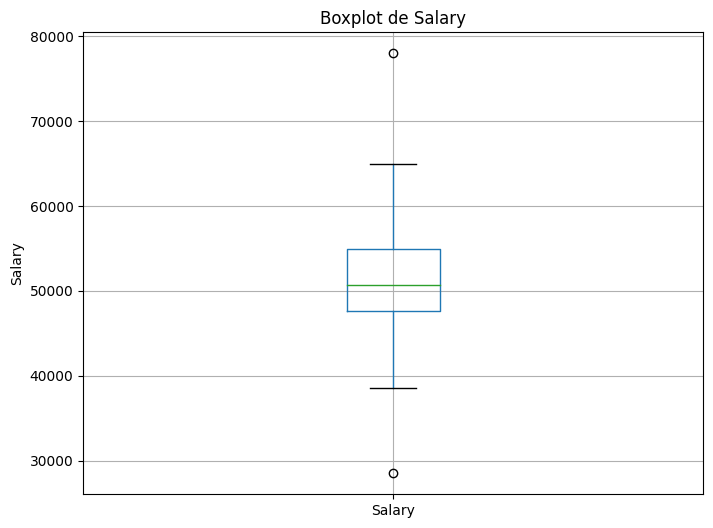

In [50]:
## seu codigo
plt.figure(figsize=(8, 6))
df.boxplot(column=['Salary'])
plt.title('Boxplot de Salary')
plt.ylabel('Salary')
plt.show()


#(a) 2 outliers globais

## Questão 5)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`, e busque por linhas duplicadas considerando apenas os dados nas colunas `Name`, `Sex`, `City` e `Year of Birth`.

A seguir, busque por atributos não informativos (redundantes/constantes) em todas as colunas. Quantas linhas duplicadas foram encontradas, e qual(is) atributo(s) pode(m) ser considerado(s) não informativo(s)?

(a) 1 linha duplicada; atributos não informativos: Continent of Origin<br>
(b) 1 linha duplicada; atributos não informativos: Profession e Country of Origin<br>
(c) 4 linhas duplicadas; atributos não informativos: Current Age 2022, Continent of Origin<br>
(d) 5 linhas duplicadas; atributos não informativos: Country of Origin<br>
(e) 5 linhas duplicadas; atributos não informativos: Current Age 2022 e Continent of Origin<br>

In [ ]:
df = pd.read_csv("TACTD-01-Base-Avaliacao2024.csv")

In [53]:
## seu codigo

colum = ['Name', 'Sex', 'City', 'Year of Birth']

duplicadas = df[df.duplicated(subset=colum, keep=False)]

print("Linhas duplicadas considerando 'Name', 'Sex', 'City' e 'Year of Birth':")
print(duplicadas)

non_informative_columns = df.columns[df.nunique() == 1]

print("\nAtributos não informativos (redundantes/constantes):")
print(non_informative_columns)

Linhas duplicadas considerando 'Name', 'Sex', 'City' e 'Year of Birth':
              Name Sex  Year of Birth Country of Residency   Religion  \
18  Apolonia Abler   F           1967               Canada  Christian   
19  Apolonia Abler   F           1967               Canada  Christian   
20  Apolonia Abler   F           1967               Canada  Christian   
65  Ruby Singleton   F           1982                  USA  Christian   
66  Ruby Singleton   F           1982                  USA  Christian   
71    Carlos Cobre   M           1983               Brazil  Christian   
72    Carlos Cobre   M           1983               Brazil  Christian   

           City Country of Origin Continent of Origin      Profession  \
18    Vancouver         Australia             Oceania  Police Officer   
19    Vancouver         Australia             Oceania  Police Officer   
20    Vancouver         Australia             Oceania  Police Officer   
65  New Orleans         Australia             Ocean

In [54]:
# Imprimir número de linhas duplicadas e atributos não informativos
print("\nNúmero de linhas duplicadas encontradas:", len(duplicadas))
print("Atributos não informativos (redundantes/constantes):", non_informative_columns)



Número de linhas duplicadas encontradas: 7
Atributos não informativos (redundantes/constantes): Index(['Continent of Origin'], dtype='object')
